# Previsão de Preços de Casas com Machine Learning 

## Contexto

O mercado imobiliário é dinâmico e multifacetado — o valor de uma casa não depende apenas de seu tamanho ou localização, mas também de fatores como qualidade da construção, idade do imóvel, presença de garagem, tipo de acabamento, entre outros. 

Neste projeto, trabalhamos com um conjunto de dados detalhado sobre residências em Ames, Iowa, contendo 79 variáveis explicativas que descrevem características físicas, estruturais e geográficas dos imóveis. Com base nessas informações, nosso objetivo é construir modelos de aprendizado de máquina capazes de prever com precisão o preço de venda de uma casa.

## Objetivo

Mais do que apenas treinar algoritmos, este projeto busca gerar **valor prático**:

- Para **compradores e vendedores**, ele pode ajudar a estimar o valor justo de um imóvel, com base em suas características, evitando decisões impulsivas ou prejuízos financeiros.  
- Para **corretores, investidores ou empresas do setor imobiliário**, ele pode oferecer uma ferramenta estratégica para avaliação de portfólios, definição de preços e identificação de oportunidades de mercado.  
- Para **profissionais de dados**, é uma oportunidade de aplicar técnicas robustas de pré-processamento, modelagem e validação cruzada em um problema realista e desafiador.

Ao final do projeto, não apenas saberemos qual modelo melhor prevê os preços, mas também entenderemos **quais fatores realmente influenciam o valor de uma casa** e como esses insights podem ser usados para tomadas de decisão mais inteligentes no setor imobiliário.

Vamos em frente!

In [226]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pré-processamento e Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [227]:
# Carregando os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [269]:
# Dicionário de tradução para português
colunas_pt = {
    'Id': 'Id',
    'MSSubClass': 'Classe_MS',
    'MSZoning': 'Zona_MS',
    'LotFrontage': 'Frente_Lote',
    'LotArea': 'Area_Lote',
    'Street': 'Rua',
    'Alley': 'Beco',
    'LotShape': 'Forma_Lote',
    'LandContour': 'Contorno_Terreno',
    'Utilities': 'Servicos_Publicos',
    'LotConfig': 'Config_Lote',
    'LandSlope': 'Inclinação_Terreno',
    'Neighborhood': 'Bairro',
    'Condition1': 'Condicao1',
    'Condition2': 'Condicao2',
    'BldgType': 'Tipo_Construcao',
    'HouseStyle': 'Estilo_Casa',
    'OverallQual': 'Qualidade_Geral',
    'OverallCond': 'Condicao_Geral',
    'YearBuilt': 'Ano_Construcao',
    'YearRemodAdd': 'Ano_Reforma',
    'RoofStyle': 'Estilo_Telhado',
    'RoofMatl': 'Material_Telhado',
    'Exterior1st': 'Exterior1',
    'Exterior2nd': 'Exterior2',
    'MasVnrType': 'Tipo_Veneer',
    'MasVnrArea': 'Area_Veneer',
    'ExterQual': 'Qualidade_Exterior',
    'ExterCond': 'Condicao_Exterior',
    'Foundation': 'Fundacao',
    'BsmtQual': 'Qualidade_Porão',
    'BsmtCond': 'Condicao_Porão',
    'BsmtExposure': 'Exposicao_Porão',
    'BsmtFinType1': 'TipoAcab_Porão1',
    'BsmtFinSF1': 'AreaAcab_Porão1',
    'BsmtFinType2': 'TipoAcab_Porão2',
    'BsmtFinSF2': 'AreaAcab_Porão2',
    'BsmtUnfSF': 'AreaNaoAcab_Porão',
    'TotalBsmtSF': 'AreaTotal_Porão',
    'Heating': 'Aquecimento',
    'HeatingQC': 'Qualidade_Aquecimento',
    'CentralAir': 'ArCentral',
    'Electrical': 'Eletrico',
    '1stFlrSF': 'Area1Andar',
    '2ndFlrSF': 'Area2Andar',
    'LowQualFinSF': 'AreaBaixaQualidade',
    'GrLivArea': 'AreaHab',
    'BsmtFullBath': 'BanheiroCompleto_Porão',
    'BsmtHalfBath': 'Lavabo_Porão',
    'FullBath': 'BanheiroCompleto',
    'HalfBath': 'Lavabo',
    'BedroomAbvGr': 'QuartosAcimaSolo',
    'KitchenAbvGr': 'CozinhasAcimaSolo',
    'KitchenQual': 'Qualidade_Cozinha',
    'TotRmsAbvGrd': 'TotalComodos_AcimaSolo',
    'Functional': 'Funcionalidade',
    'Fireplaces': 'Lareiras',
    'FireplaceQu': 'Qualidade_Lareira',
    'GarageType': 'Tipo_Garagem',
    'GarageYrBlt': 'AnoConstrucao_Garagem',
    'GarageFinish': 'Acabamento_Garagem',
    'GarageCars': 'CapacidadeCarros_Garagem',
    'GarageArea': 'Area_Garagem',
    'GarageQual': 'Qualidade_Garagem',
    'GarageCond': 'Condicao_Garagem',
    'PavedDrive': 'EntradaPavimentada',
    'WoodDeckSF': 'AreaDeckMadeira',
    'OpenPorchSF': 'AreaVarandaAberta',
    'EnclosedPorch': 'AreaVarandaFechada',
    '3SsnPorch': 'AreaVaranda3Estacoes',
    'ScreenPorch': 'AreaVarandaTela',
    'PoolArea': 'AreaPiscina',
    'PoolQC': 'Qualidade_Piscina',
    'Fence': 'Cerca',
    'MiscFeature': 'CaracteristicaExtra',
    'MiscVal': 'ValorExtra',
    'MoSold': 'MesVenda',
    'YrSold': 'AnoVenda',
    'SaleType': 'TipoVenda',
    'SaleCondition': 'CondicaoVenda'
}

# Renomear colunas no DataFrame
train.rename(columns=colunas_pt, inplace=True)
test.rename(columns=colunas_pt, inplace=True)


In [271]:
# Visualizando as primeiras linhas dos dados de treinanto 
train.head()

,Id,Classe_MS,Zona_MS,Frente_Lote,Area_Lote,Rua,Forma_Lote,Contorno_Terreno,Servicos_Publicos,Config_Lote,...,AreaVaranda3Estacoes,AreaVarandaTela,AreaPiscina,ValorExtra,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220


In [273]:
# Visualizando as primeiras linhas dos dados de teste 
test.head()

,Id,Classe_MS,Zona_MS,Frente_Lote,Area_Lote,Rua,Forma_Lote,Contorno_Terreno,Servicos_Publicos,Config_Lote,...,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaVarandaTela,AreaPiscina,ValorExtra,MesVenda,AnoVenda,TipoVenda,CondicaoVenda
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [275]:
# Dimensão dos dados
print("Shape do dataset de treino:", train.shape)
print("Shape do dataset de teste:", test.shape)

Shape do dataset de treino: (1460, 78)
Shape do dataset de teste: (1459, 76)


In [277]:
# Informações dos dados
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1460 non-null   int64  
 1   Classe_MS                 1460 non-null   int64  
 2   Zona_MS                   1460 non-null   object 
 3   Frente_Lote               1460 non-null   float64
 4   Area_Lote                 1460 non-null   int64  
 5   Rua                       1460 non-null   object 
 6   Forma_Lote                1460 non-null   object 
 7   Contorno_Terreno          1460 non-null   object 
 8   Servicos_Publicos         1460 non-null   object 
 9   Config_Lote               1460 non-null   object 
 10  Inclinação_Terreno        1460 non-null   object 
 11  Bairro                    1460 non-null   object 
 12  Condicao1                 1460 non-null   object 
 13  Condicao2                 1460 non-null   object 
 14  Tipo_Con

In [279]:
# Valores ausentes - treino
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print("Valores ausentes no conjunto de TREINO:")
print(missing_train)

# Verificando valores ausentes no teste
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print("\nValores ausentes no conjunto de TESTE:")
print(missing_test)

Valores ausentes no conjunto de TREINO:
Series([], dtype: int64)

Valores ausentes no conjunto de TESTE:
Series([], dtype: int64)


In [281]:
# Analisar a descrição dos dados 
train.describe()

,Id,Classe_MS,Frente_Lote,Area_Lote,Qualidade_Geral,Condicao_Geral,Ano_Construcao,Ano_Reforma,Area_Veneer,Qualidade_Exterior,...,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaVarandaTela,AreaPiscina,ValorExtra,MesVenda,AnoVenda,SalePrice,SalePrice_log
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,2.539726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,12.024057
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,0.693995,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.399449
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,10.460271
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,11.775105
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,12.001512
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,3.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,3.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,13.534474


In [283]:
test.describe()

,Id,Classe_MS,Frente_Lote,Area_Lote,Qualidade_Geral,Condicao_Geral,Ano_Construcao,Ano_Reforma,Area_Veneer,Qualidade_Exterior,...,Area_Garagem,AreaDeckMadeira,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaVarandaTela,AreaPiscina,ValorExtra,MesVenda,AnoVenda
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,57.910212,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,2.521590,...,472.444825,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,32.266054,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,0.710527,...,217.326902,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,0.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,44.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,2.000000,...,317.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,63.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,3.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,3.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,3.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [285]:
# Calcula a correlação apenas para variáveis numéricas
corr_matrix = train.corr(numeric_only=True)

# Ordena pela correlação com a variável alvo (ex: SalePrice)
corr_target = corr_matrix["SalePrice"].sort_values(ascending=False)

# Coloca em formato de tabela
corr_df = corr_target.reset_index()
corr_df.columns = ["Variável", "Correlação com SalePrice"]

corr_df


,Variável,Correlação com SalePrice
0,SalePrice,1.000000
1,SalePrice_log,0.948374
2,Qualidade_Geral,0.790982
3,AreaHab,0.708624
4,CapacidadeCarros_Garagem,0.640409
5,Area_Garagem,0.623431
6,AreaTotal_Porão,0.613581
7,Area1Andar,0.605852
8,BanheiroCompleto,0.560664
9,TotalComodos_AcimaSolo,0.533723


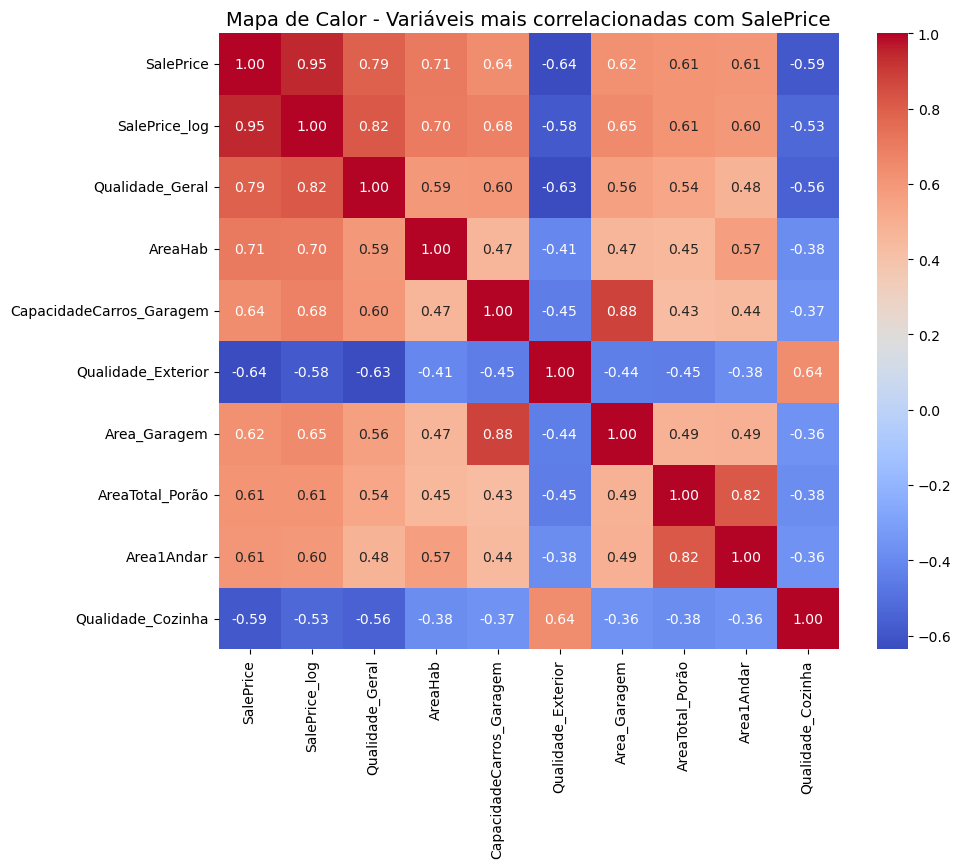

In [287]:
# Calcula a correlação só para variáveis numéricas
corr_matrix = train.corr(numeric_only=True)

# Seleciona as variáveis mais correlacionadas com SalePrice
top_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10).index

# Filtra a matriz apenas para essas variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr].corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            cbar=True)
plt.title("Mapa de Calor - Variáveis mais correlacionadas com SalePrice", fontsize=14)
plt.show()


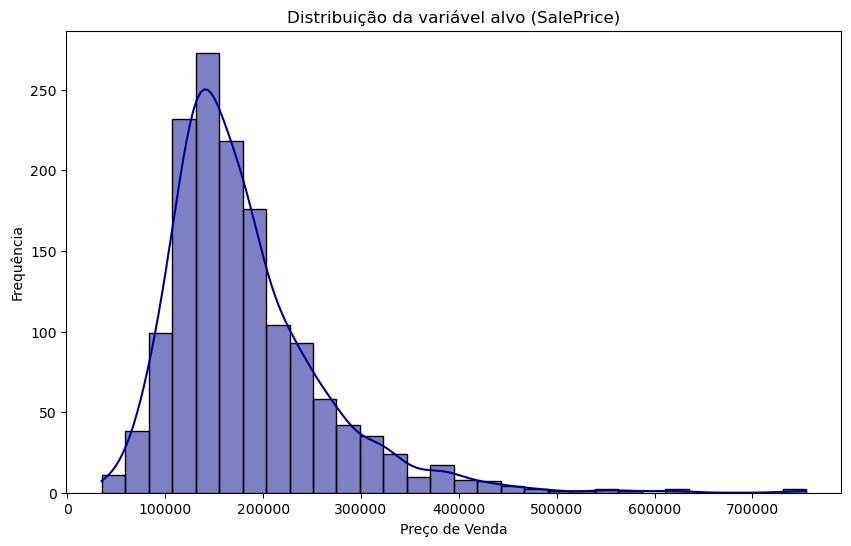

In [288]:
# Distribuição do preço de venda
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, bins=30, color='darkblue')
plt.title("Distribuição da variável alvo (SalePrice)")
plt.xlabel("Preço de Venda")
plt.ylabel("Frequência")
plt.show()


##  Distribuição do Alvo

A variável `SalePrice` representa o preço de venda das casas e é o nosso alvo principal.


Analisando o gráfico, percebemos que a distribuição de `SalePrice` é claramente **assimétrica à direita** (distribuição enviesada para valores maiores). Isso é comum em dados de preços, onde há muitas casas com valores mais baixos e poucas muito caras.

Essa assimetria indica que pode ser interessante aplicar uma **transformação logarítmica** para aproximar a distribuição de uma forma mais normal, o que ajuda muitos algoritmos de machine learning a performarem melhor.

Também é possível notar alguns **outliers à direita**, casas com preços muito altos que fogem da tendência geral, e que podem precisar de atenção especial durante a modelagem.


##  Primeiras Impressões dos Dados

Antes de partir para qualquer modelagem, dei uma boa olhada na estrutura dos dados pra entender melhor o que estou lidando. Abaixo estão algumas observações iniciais que anotei:

###  Dimensões dos Dados

- **Treino:** 1.460 linhas e 81 colunas  
- **Teste:** 1.459 linhas e 80 colunas  
- A variável `SalePrice`, que é o preço de venda das casas, está apenas no conjunto de treino — vai ser a variável-alvo do modelo.

###  Tipos de Variáveis

- **Numéricas:** 38 colunas (tipos `int64` e `float64`)
- **Categóricas:** 43 colunas (objetos/textos)

Tem de tudo um pouco: qualidade da cozinha (`KitchenQual`), tipo de zoneamento (`MSZoning`), bairro (`Neighborhood`), etc. Isso significa que mais pra frente vou precisar transformar essas categorias em números (provavelmente com one-hot ou ordinal encoding, dependendo do caso).

###  Valores Ausentes

Notei várias colunas com valores nulos — algumas com bastante mesmo. Seguem alguns destaques:

-  Colunas como `PoolQC`, `MiscFeature`, `Alley`, `Fence` e `FireplaceQu` têm **mais de 50% dos valores ausentes**. Provavelmente é porque muitas casas nem têm esses itens.  
  -  Ideia: substituir os NaNs por `'None'` (tipo "não tem mesmo") ou algum valor fixo como -1.

-  `LotFrontage` (largura da frente do terreno) tem bastantes nulos também — 259 no treino e 227 no teste.  
  -  Pode fazer sentido preencher usando a média por bairro (`Neighborhood`), já que isso pode influenciar bastante essa medida.

-  Variáveis da garagem (`GarageType`, `GarageYrBlt`, etc.) também têm muitos nulos, e parece ser sempre nas casas que **não têm garagem**.  
  -  Aqui também vale preencher com `'None'` ou `0`, dependendo se a coluna for categórica ou numérica.

-  `MasVnrType` e `MasVnrArea` (revestimento de alvenaria) estão com nulos combinados — deve ser porque a casa não tem esse tipo de acabamento.

-  `Electrical` tem só **1 valor ausente** — nada sério. Aqui dá pra preencher com a **moda** da coluna.

> Nem todo NaN aqui parece ser "dado perdido" — na real, muitos representam mesmo a **ausência da característica**. Isso muda bastante o jeito de tratar os dados.

---

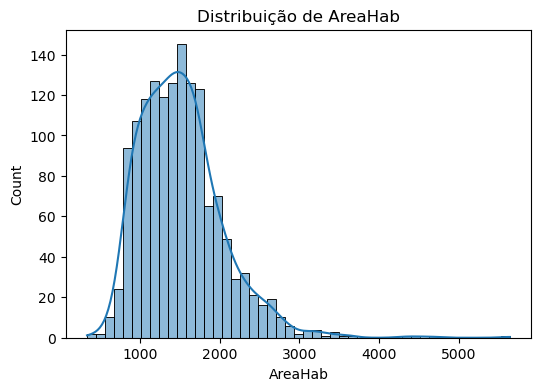

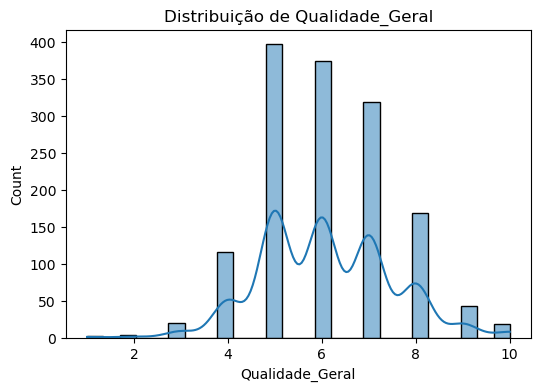

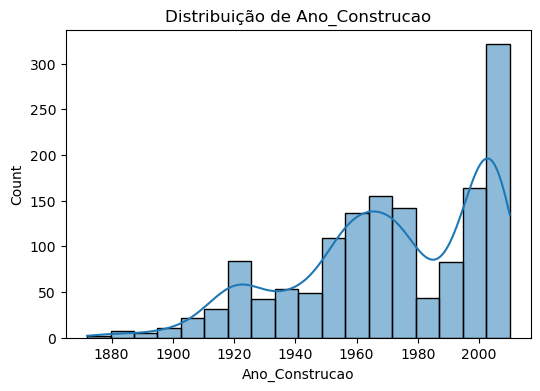

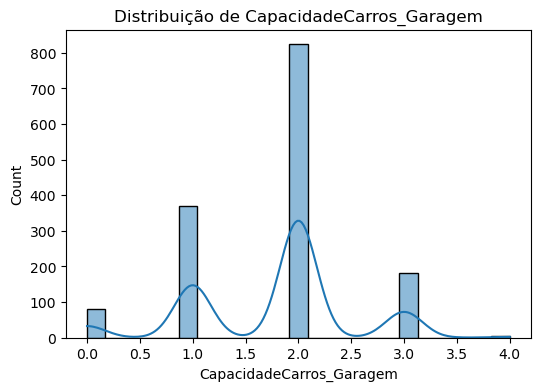

In [361]:
# Univariada - numérica 
num_vars = ['AreaHab', 'Qualidade_Geral', 'Ano_Construcao', 'CapacidadeCarros_Garagem']
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(train[var], kde=True)
    plt.title(f'Distribuição de {var}')
    plt.show()


###  Análise Univariada – Considerações
Durante a análise univariada, foi possível identificar algumas características importantes dos dados:

- **Qualidade Geral**  
  Valores entre 1 e 10, com maior concentração entre 5 e 8 → imóveis de qualidade média a boa.  

- **Área Habitacional (AreaHab)**  
  Concentração entre 800 e 2.000 pés² → presença de outliers acima de 4000 pés².  

- **Ano de Construção (Ano_Construcao)**  
  Maioria construída entre 1950 e 2010 → poucas casas muito antigas ou muito recentes.  

- **Capacidade de Carros na Garagem (CapacidadeCarros_Garagem)**  
  Predomínio de 1 a 3 vagas, com pico em 2 → poucas casas com 0 ou 4 vagas.  

Essas observações levantam a possibilidade de:
- Ajustar ou remover outliers.  
- Criar variáveis derivadas (ex.: idade do imóvel, presença/ausência de garagem).  

---

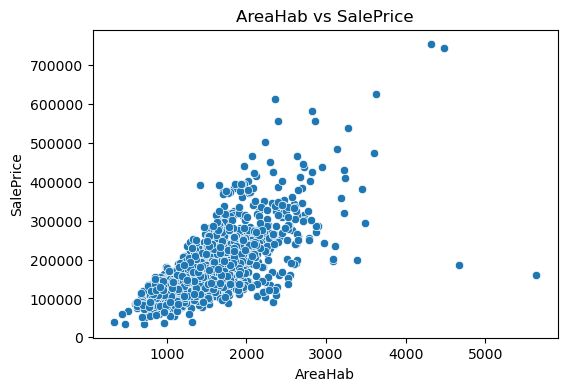

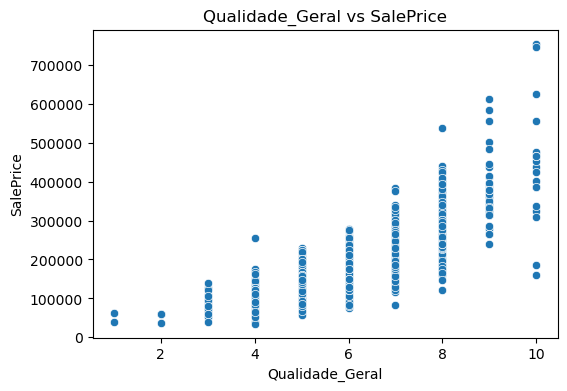

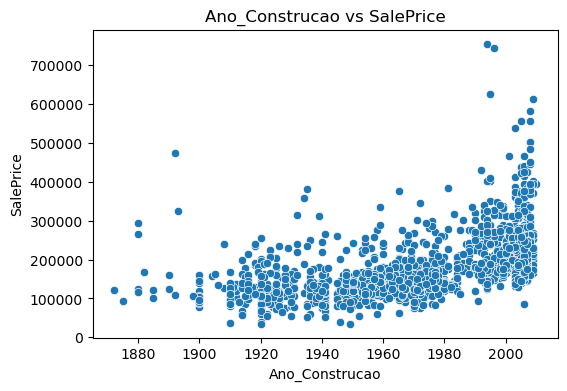

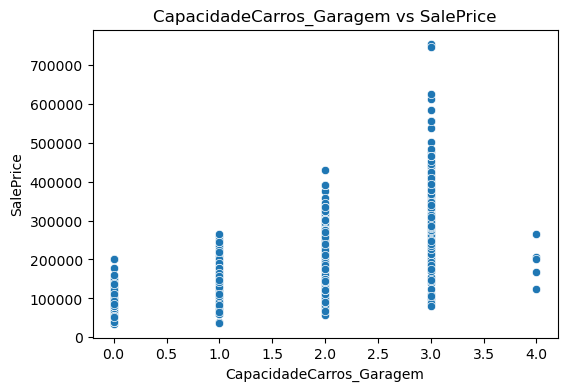

In [363]:
# Bivariada - numérica x target
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[var], y=train['SalePrice'])
    plt.title(f'{var} vs SalePrice')
    plt.show()


### 🔎 Análise Bivariada – Principais Insights
Comparando variáveis preditoras com a variável-alvo (*SalePrice*), destacam-se:

- **Área Habitacional (AreaHab)**  
  Relação linear clara: casas maiores → preços mais altos.  
  Outliers acima de 4000 pés² podem distorcer modelos.  

- **Qualidade Geral (Qualidade_Geral)**  
  Relação quase linear em degraus: maior qualidade → maior preço.  
  Deve ser tratada como **ordinal**.  

- **Ano de Construção (Ano_Construcao)**  
  Tendência de aumento em casas mais recentes, principalmente após 2000.  
  Sugestão: criar *Idade do Imóvel* ou flag para pós-2000.  

- **Capacidade de Carros na Garagem (CapacidadeCarros_Garagem)**  
  Relação positiva em degraus: mais vagas → maior preço.  
  Casas com 2 ou 3 vagas concentram preços mais altos.  
  Sugestão: tratar como categórica (sem vaga, 1 vaga, padrão [2], ampla [3+]).  

---

### ✅ Resumindo
- Outliers relevantes em *AreaHab*.  
- **Qualidade Geral** é altamente explicativa.  
- **Ano de Construção** pode ser transformado em *idade do imóvel*.  
- **Capacidade de Garagem** explica bem os preços e pode ser categorizada. 


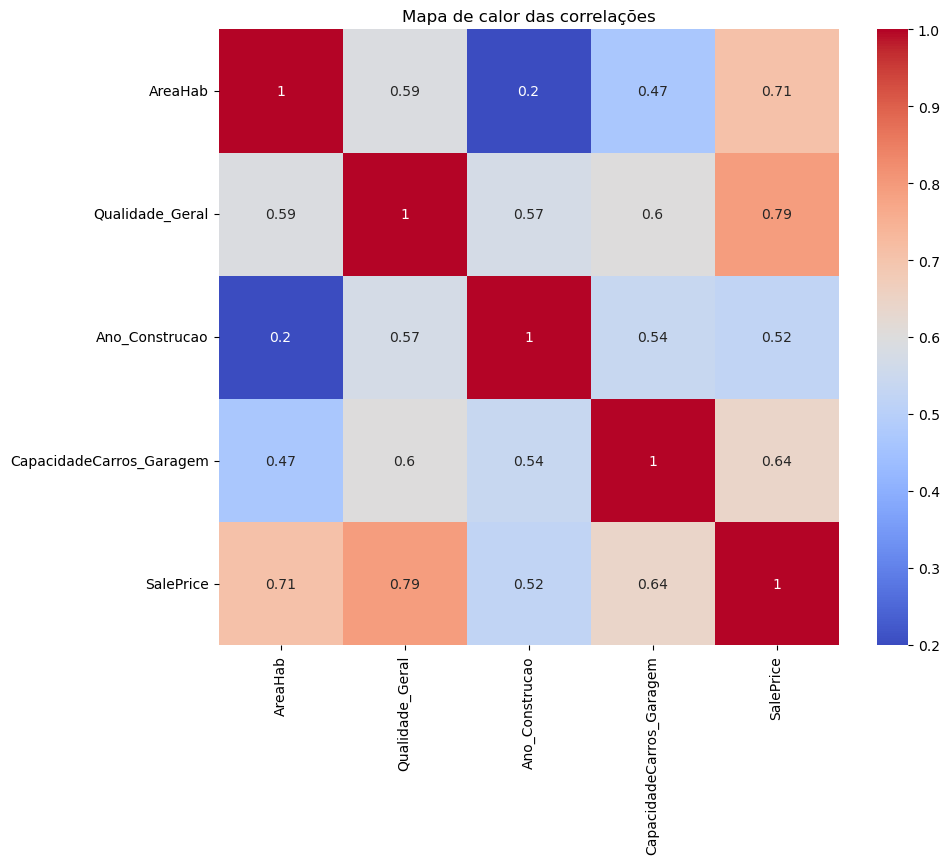

In [368]:
# Multivariada - correlação heatmap
plt.figure(figsize=(10,8))
corr = train[num_vars + ['SalePrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor das correlações')
plt.show()

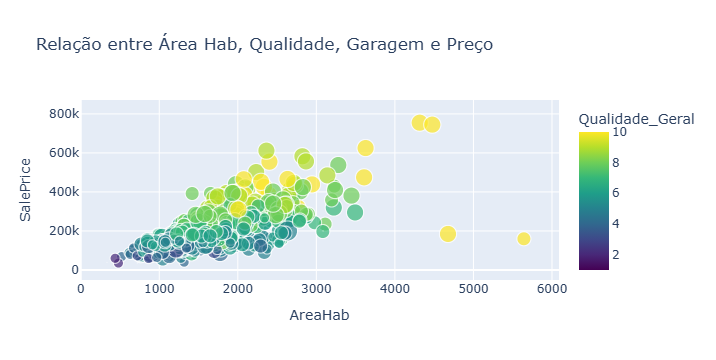

In [419]:
# Multivariada - "Relação entre Área Hab, Qualidade, Garagem e Preço"
fig = px.scatter(
    train, 
    x="AreaHab", 
    y="SalePrice",
    color="Qualidade_Geral",   # escala pela qualidade
    size="CapacidadeCarros_Garagem",  
    hover_data=["Ano_Construcao"],
    title="Relação entre Área Hab, Qualidade, Garagem e Preço",
    color_continuous_scale=px.colors.sequential.Viridis   # escala de cor ajustada
)

fig.show()


In [421]:
# Removendo colunas com mais de 80% de nulos 
null_thresh = 0.8
missinng_ratio = train.isnull().sum() / len(train)
cols_to_drop = missinng_ratio[missinng_ratio > null_thresh].index
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [423]:
# Preenchendo valores ausentes com 'NA' (colunas categóricas)
cols_cat = train.select_dtypes(include='object').columns
train[cols_cat] = train[cols_cat].fillna('NA')
test[cols_cat] = test[cols_cat].fillna('NA')

In [425]:
# Preenchendo com 0 as colunas númericas
cols_num_train = train.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
cols_num_test = test.select_dtypes(include=['int64', 'float64']).columns

# Para o treino
train[cols_num_train] = train[cols_num_train].fillna(0)

# Para o teste
test[cols_num_test] = test[cols_num_test].fillna(0)

In [427]:
# Preenchendo colunas com poucos nulos com a moda
for col in train.columns:
    if train[col].isnull().sum() > 0:
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)


In [429]:
# Verificando valores nulos no dataset de treino 
print('Valores nulos no treino após tratamento:')
print(train.isnull().sum()[train.isnull().sum() > 0 ])

# Verificar valoes nulos no datset de teste 
print("\nValoes nulos no teste após tratamneto:")
print(test.isnull().sum()[test.isnull().sum() > 0])

Valores nulos no treino após tratamento:
Series([], dtype: int64)

Valoes nulos no teste após tratamneto:
Series([], dtype: int64)


In [431]:
# Preencher Frente_Lote com a média da vizinhança (Bairro)
train['Frente_Lote'] = train.groupby('Bairro')['Frente_Lote'].transform(lambda x: x.fillna(x.mean()))
test['Frente_Lote'] = test.groupby('Bairro')['Frente_Lote'].transform(lambda x: x.fillna(x.mean()))


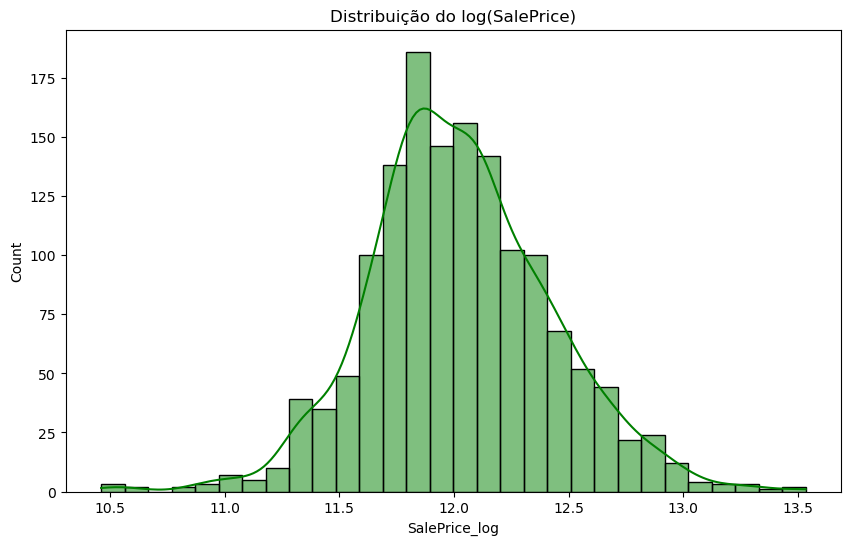

In [433]:
# Transformar a variável alvo com log para normalizar a distribuição
train['SalePrice_log'] = np.log1p(train['SalePrice'])

# Visualizar como ficou a distribuição após o log
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice_log'], kde=True, color='green', bins=30)
plt.title("Distribuição do log(SalePrice)")
plt.show()


### Por que aplicar log na variável alvo?

A variável `SalePrice` apresenta uma distribuição assimétrica, o que pode prejudicar modelos lineares e até mesmo outros modelos que assumem erros normalmente distribuídos.

Aplicar o log (mais precisamente log1p para evitar problema com zero) ajuda a aproximar a distribuição para uma normal, facilitando o aprendizado dos modelos.


In [436]:
# Calcular a correlação de todas as variáveis com SalePrice_log
corr_com_saleprice = train.corr(numeric_only=True)['SalePrice_log'].sort_values(ascending=False)

# Criar um DataFrame a partir da série de correlações para uma visualização melhor
corr_df = pd.DataFrame(corr_com_saleprice)
corr_df.rename(columns={'SalePrice_log': 'Correlação com SalePrice'}, inplace=True)

# Exibir a tabela
corr_df

,Correlação com SalePrice
SalePrice_log,1.000000
SalePrice,0.948374
Qualidade_Geral,0.817185
AreaHab,0.700927
CapacidadeCarros_Garagem,0.680625
Area_Garagem,0.650888
AreaTotal_Porão,0.612134
Area1Andar,0.596981
BanheiroCompleto,0.594771
Ano_Construcao,0.586570


##  Insights Principais da Tabela de Correlação

Analisando os resultados de correlação entre as variáveis e o preço de venda (SalePrice_log), podemos destacar os seguintes pontos:

---

###  Qualidade Geral é o Fator Mais Importante
- **`OverallQual`** (qualidade geral da casa) tem a **maior correlação positiva** com o preço (0.817).
- Isso confirma que quanto **melhor a qualidade percebida**, **maior será o preço de venda**.

---

###  Espaço Interno é Fundamental
- Variáveis como:
  - **`GrLivArea`** (área útil acima do solo),
  - **`TotalBsmtSF`** (área total do porão),
  - **`1stFlrSF`** (área do primeiro andar)  
- Apresentam correlações altas e positivas, mostrando que **mais espaço habitável tende a significar preços mais altos**.

---

###  Garagem é um Diferencial
- **`GarageCars`** (número de vagas) e **`GarageArea`** (área da garagem) têm correlações de **0.681** e **0.651**, respectivamente.
- Isso mostra que **uma garagem espaçosa** é **valorizada** no mercado imobiliário.

---

###  Ano de Construção e Reforma Influenciam no Preço
- **`YearBuilt`** (ano de construção) e **`YearRemodAdd`** (ano de reforma) apresentam correlações positivas.
- **Casas mais novas** ou **recentemente reformadas** tendem a ter **valores mais elevados**.

---

###  Variáveis com Baixa ou Nenhuma Correlação
- Variáveis como:
  - **`BsmtFinSF2`** (segunda área finalizada do porão),
  - **`BsmtHalfBath`** (meio banheiro no porão), entre outras,  
- Têm correlação próxima de **zero**, indicando **baixa influência no preço final** e podendo ser irrelevantes para o modelo.

---

###  Correlações Negativas (e Pouco Relevantes)
- Algumas variáveis apresentam **correlação negativa**


In [439]:
# Unir train e test para aplicar o mesmo pré-processamento (OneHotEncoding)
train_len = train.shape[0]
test_len = test.shape[0]

# Remover target para a união
all_data = pd.concat([train.drop(['SalePrice', 'SalePrice_log'], axis=1), test], axis=0)

# OneHotEncoding nas variáveis categóricas
all_data = pd.get_dummies(all_data)

# Separar novamente
X_train = all_data[:train_len]
X_test = all_data[train_len:]

y_train = train['SalePrice_log']


### Por que aplicar One-Hot Encoding?

Os modelos que usaremos não lidam diretamente com variáveis categóricas. O One-Hot Encoding cria colunas binárias para cada categoria, permitindo que o modelo processe essas informações corretamente.

Além disso, unimos os datasets para garantir que o encoding seja consistente em treino e teste.


In [442]:
# Modelo: Regressão Linear
lr = LinearRegression()

# Avaliação com cross-validation (5 folds), usando RMSE na escala original
neg_rmse = cross_val_score(lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -neg_rmse

print(f"Regressão Linear - RMSE médio: {rmse_scores.mean():.4f} (Log scale)")


Regressão Linear - RMSE médio: 0.1540 (Log scale)


In [443]:
# Modelo: Árvore de Decisão

dt = DecisionTreeRegressor(random_state=42)

neg_rmse = cross_val_score(dt, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -neg_rmse

print(f"Árvore de Decisão - RMSE médio: {rmse_scores.mean():.4f} (Log scale)")



Árvore de Decisão - RMSE médio: 0.2012 (Log scale)


In [444]:
# Modelo: XGBoost (com parâmetros padrão)

xgbr = xgb.XGBRegressor(random_state=42, n_jobs=-1)

neg_rmse = cross_val_score(xgbr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -neg_rmse

print(f"XGBoost - RMSE médio: {rmse_scores.mean():.4f} (Log scale)")


XGBoost - RMSE médio: 0.1408 (Log scale)


In [446]:
model_names = ['Regressão Linear', 'Árvore de Decisão', 'XGBoost']
model_rmse = []

for model in [lr, dt, xgbr]:
    neg_rmse = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    model_rmse.append(-neg_rmse.mean())

results = pd.DataFrame({'Modelo': model_names, 'RMSE médio (log scale)': model_rmse})
results = results.sort_values(by='RMSE médio (log scale)')
results


,Modelo,RMSE médio (log scale)
2,XGBoost,0.140772
0,Regressão Linear,0.154011
1,Árvore de Decisão,0.201220


In [449]:

# Definindo o modelo
xgbr = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Definindo o grid de parâmetros a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores
    'learning_rate': [0.05, 0.1, 0.2]  # Taxa de aprendizado
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           verbose=1)

# Executando a busca (pode levar alguns minutos)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [454]:
# Exibindo os melhores parâmetros e o melhor score
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor RMSE médio (log scale): {-grid_search.best_score_:.4f}")

# Exibindo os resultados completos
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results[['params', 'mean_test_score']]

Melhores parâmetros: {'learning_rate': 0.1, 'n_estimators': 300}
Melhor RMSE médio (log scale): 0.1341


,params,mean_test_score
5,"{'learning_rate': 0.1, 'n_estimators': 300}",-0.134146
4,"{'learning_rate': 0.1, 'n_estimators': 200}",-0.134426
3,"{'learning_rate': 0.1, 'n_estimators': 100}",-0.134669
2,"{'learning_rate': 0.05, 'n_estimators': 300}",-0.134940
1,"{'learning_rate': 0.05, 'n_estimators': 200}",-0.135381
0,"{'learning_rate': 0.05, 'n_estimators': 100}",-0.137957
6,"{'learning_rate': 0.2, 'n_estimators': 100}",-0.139683
8,"{'learning_rate': 0.2, 'n_estimators': 300}",-0.139725
7,"{'learning_rate': 0.2, 'n_estimators': 200}",-0.139733


##  Comparação entre Modelos

Testamos três modelos diferentes para prever o `SalePrice` (após aplicar transformação logarítmica):

| Modelo               | RMSE Médio (log scale) |
|----------------------|------------------------|
| XGBoost              | **0.134**              |
| Regressão Linear     | 0.155                  |
| Árvore de Decisão    | 0.208                  |

###  Análise

-  **XGBoost teve o melhor desempenho**, com o menor erro médio (RMSE). Isso mostra que o modelo conseguiu capturar bem as variações no preço das casas, mesmo com uma distribuição assimétrica e várias variáveis categóricas.
-  **Regressão Linear** ainda teve um desempenho razoável, mas não tão bom quanto o XGBoost — o que já era esperado, pois ela faz suposições mais rígidas sobre a relação entre as variáveis.
-  **Árvore de Decisão** teve o pior desempenho, provavelmente por **overfitting** e **baixa capacidade de generalização** quando usada sozinha (sem ensemble).

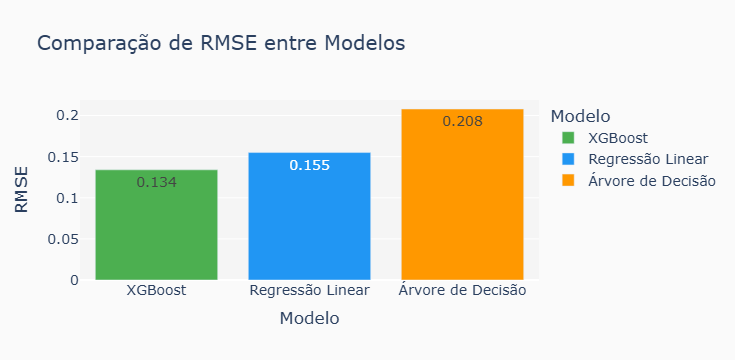

In [460]:

# Dados da tabela
dados = {
    "Modelo": ["XGBoost", "Regressão Linear", "Árvore de Decisão"],
    "RMSE": [0.134, 0.155, 0.208]
}
df = pd.DataFrame(dados)

# Gráfico de barras
fig = px.bar(
    df, 
    x="Modelo", 
    y="RMSE", 
    color="Modelo",
    text="RMSE",
    title="Comparação de RMSE entre Modelos",
    color_discrete_sequence=["#4CAF50", "#2196F3", "#FF9800"]  # cores customizadas
)

# Layout mais limpo
fig.update_layout(
    plot_bgcolor="rgb(245,245,245)",
    paper_bgcolor="rgb(250,250,250)",
    font=dict(size=14),
)
fig.show()


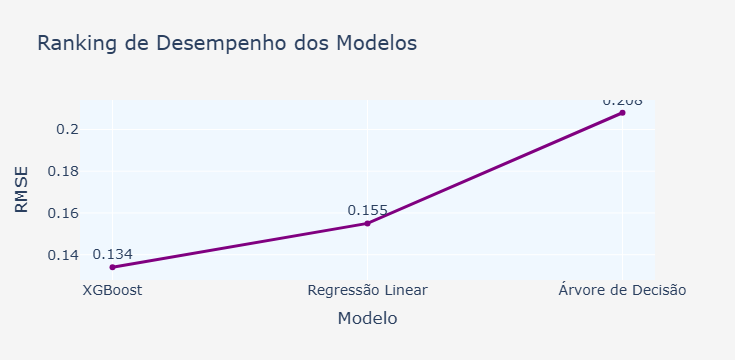

In [462]:
# Gráfico de linha para destacar o ranking
fig2 = px.line(
    df, 
    x="Modelo", 
    y="RMSE", 
    markers=True,
    title="Ranking de Desempenho dos Modelos",
    text="RMSE"
)

fig2.update_traces(textposition="top center", line=dict(width=3, color="purple"))

fig2.update_layout(
    plot_bgcolor="rgb(240,248,255)",
    paper_bgcolor="rgb(245,245,245)",
    font=dict(size=14),
)
fig2.show()
